## Importing Packages

In [20]:
import cv2
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import skimage.exposure as ex
import skimage.color as clr
from scipy import ndimage
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, label
from skimage.measure import find_contours
from skimage.filters import threshold_otsu
from skimage import feature
from skimage.feature import hog

## Loading Image

In [24]:
img = io.imread("C:\\Users\\ME\\Desktop\\image_P\\Brain tumor.jpeg")
#img = clr.rgb2gray(img)

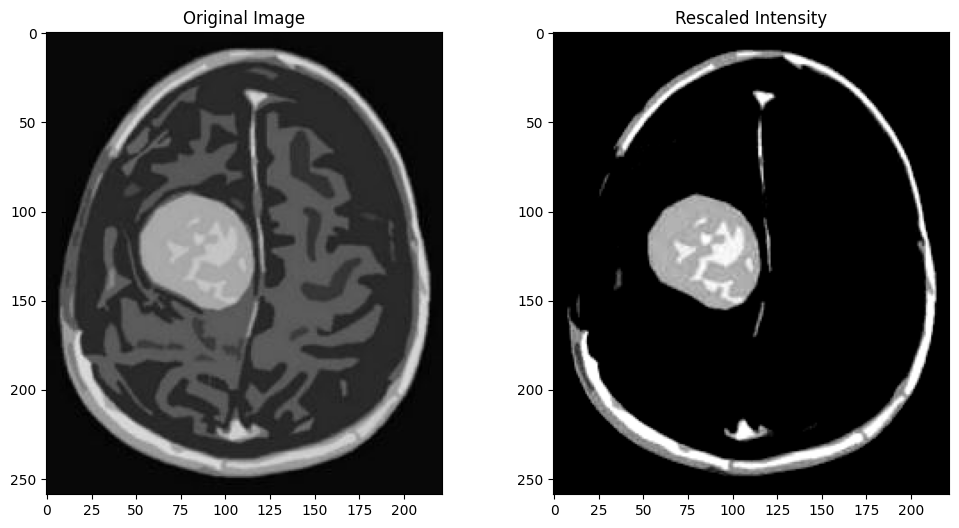

In [25]:
image_sliced_back = ex.rescale_intensity(img, in_range=(100, 200))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(image_sliced_back, cmap="gray")
plt.title("Rescaled Intensity")

plt.show()

## 1. Preprocessing the Image


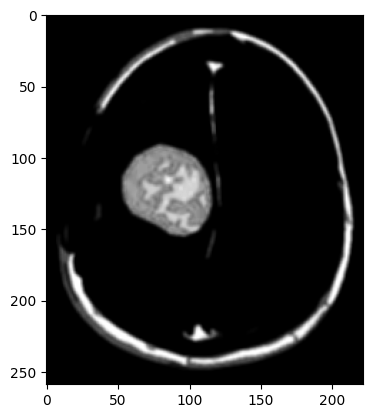

In [26]:
image_sliced_back = clr.rgb2gray(image_sliced_back)
# Contrast Enhancement
equ = ex.equalize_hist(image_sliced_back)
# Noise Reduction (mean filter)
blurred_image = ndimage.uniform_filter(equ, size=3)
plt.imshow(blurred_image,'gray')

## 2. Image Segmentation

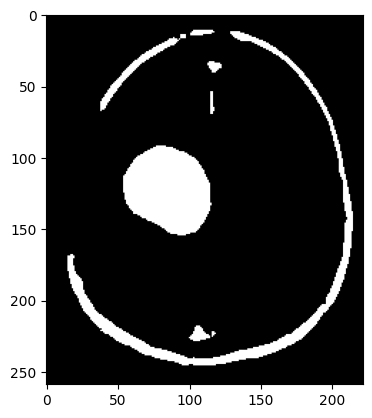

In [27]:
image = blurred_image>0.9
plt.imshow(image,'gray')

## 3. Morphology Techniques


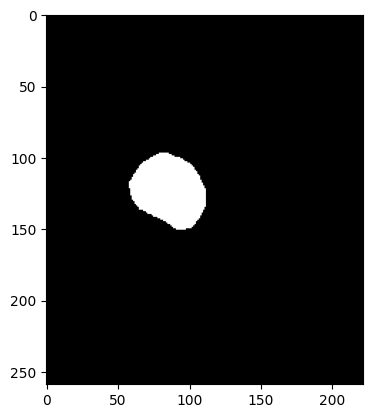

In [28]:
kernel = np.ones((8, 8), np.uint8)
g_erosion = binary_erosion(image, kernel)
plt.imshow(g_erosion, cmap='gray')

## 4. Feature Extraction

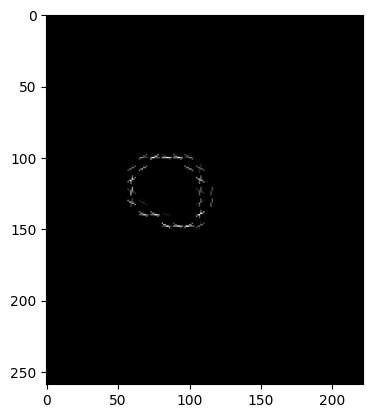

In [29]:
features_list=[]
hog_features, hog_image = feature.hog(g_erosion, visualize=True)
features_list.append(hog_features)
plt.imshow(hog_image, 'gray')

## 5. Display Results

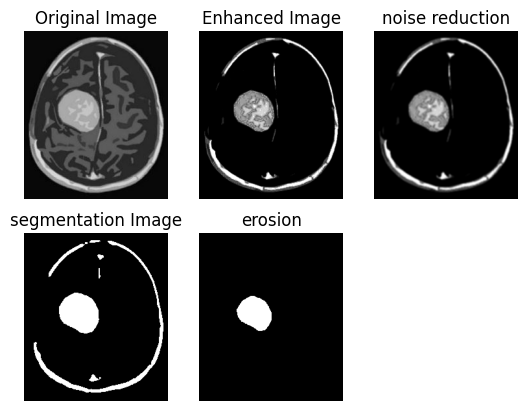

In [30]:
images = [img, equ, blurred_image, image, g_erosion]
titles = ['Original Image', 'Enhanced Image', 'noise reduction', 'segmentation Image', 'erosion']


for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off') 

plt.show()

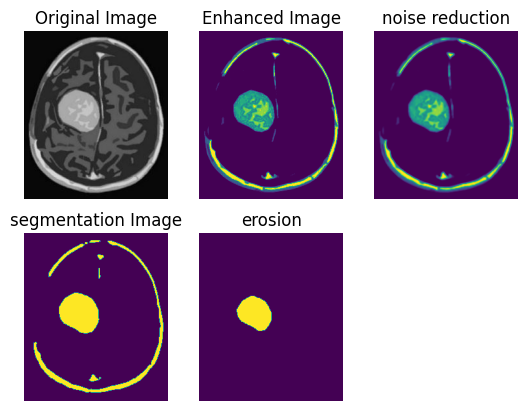

In [31]:
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off') 

plt.show()